In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X= iris.data
y=iris.target

In [3]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [6]:
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X,y)

pred = knn.predict(X)

accuracy_score(y,pred)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state=0)



In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(75, 4)
(75, 4)
(75,)
(75, 4)


In [9]:
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(x_train,y_train)

pred = knn.predict(x_test)

accuracy_score(y_test,pred)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9066666666666666

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred,labels = knn.classes_.tolist()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.85      0.93      0.89        30
           2       0.90      0.79      0.84        24

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75



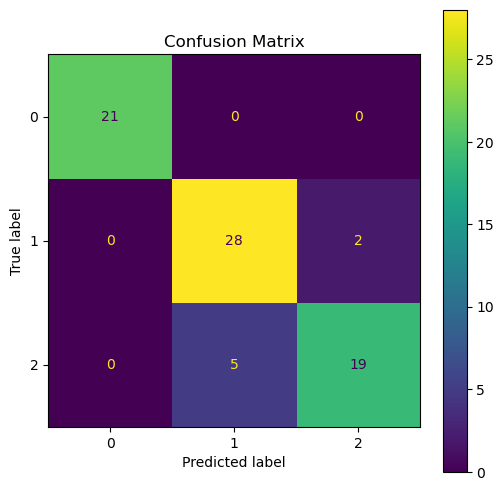

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,pred,labels = knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 2,min_samples_leaf = 4,random_state = 42)

dt.fit(x_train,y_train)

pred = dt.predict(x_test)

accuracy_score(y_test,pred)

0.8933333333333333

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred,labels = dt.classes_.tolist()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [18]:
from sklearn.ensemble import BaggingClassifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

bag = BaggingClassifier(knn,n_estimators = 20,max_samples =0.5)


bag.fit(x_train,y_train)

pred = bag.predict(x_test)

accuracy_score(y_test,pred)

0.96

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred,labels = bag.classes_.tolist()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [21]:
BaggingClassifier?

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 20,max_samples =0.5)

rf.fit(x_train,y_train)

pred = rf.predict(x_test)

accuracy_score(y_test,pred)

0.96

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred,labels = rf.classes_.tolist()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.91      1.00      0.95        30
           2       1.00      0.88      0.93        24

    accuracy                           0.96        75
   macro avg       0.97      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



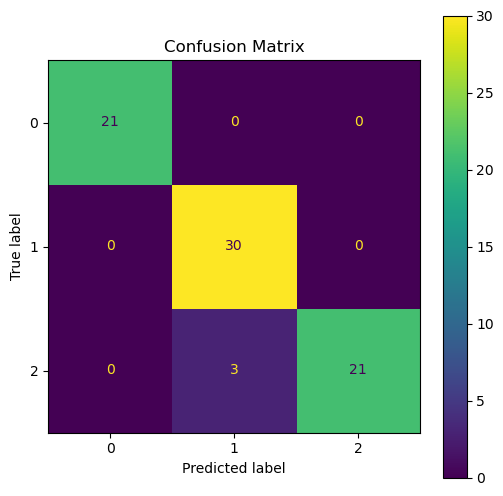

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,pred,labels = rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 2,min_samples_leaf = 4,random_state = 42)


ada = AdaBoostClassifier(dt,n_estimators = 20)


ada.fit(x_train,y_train)

pred = ada.predict(x_test)

accuracy_score(y_test,pred)

0.96

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred,labels = ada.classes_.tolist()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



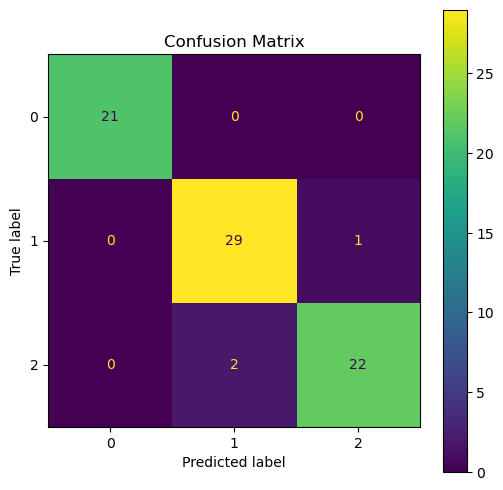

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,pred,labels = ada.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=ada.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

In [28]:
import pandas as pd
train  = pd.read_csv("C:/Users/USER/Desktop/Ml/mnist-digit-recognizer/train.csv")
test  = pd.read_csv("C:/Users/USER/Desktop/Ml/mnist-digit-recognizer/test.csv")

In [29]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 784)


In [30]:
x_train = train.drop('label',axis=1)
y_train = train['label']

In [31]:
x_test = test

In [32]:
x_train = x_train / 255
x_test = x_test/255

In [46]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 784)


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 5,max_samples =0.5)

rf.fit(x_train,y_train)

pred = rf.predict(x_test)

In [34]:
ID = '1201200793' #student id

id = np.arange(1,10001)

d = {'ID':id,'label':pred}

df = pd.DataFrame(data = d)

df.to_csv(ID + ".csv",index=False)

In [40]:
from sklearn.ensemble import BaggingClassifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

bag = BaggingClassifier(knn,n_estimators = 5,max_samples =0.5)


bag.fit(x_train,y_train)

pred = bag.predict(x_test)


In [41]:
ID = '1201200793' #student id

id = np.arange(1,10001)

d = {'ID':id,'label':pred}

df = pd.DataFrame(data = d)

df.to_csv(ID + ".csv",index=False)

In [42]:
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 2,min_samples_leaf = 4,random_state = 42)

dt.fit(x_train,y_train)

pred = dt.predict(x_test)


In [43]:
ID = '1201200793' #student id

id = np.arange(1,10001)

d = {'ID':id,'label':pred}

df = pd.DataFrame(data = d)

df.to_csv(ID + ".csv",index=False)

In [45]:
from sklearn.ensemble import BaggingClassifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

bag = BaggingClassifier(knn,n_estimators = 20,max_samples =0.5)


bag.fit(x_train,y_train)

pred = bag.predict(x_test)


In [47]:
ID = '1201200793' #student id

id = np.arange(1,10001)

d = {'ID':id,'label':pred}

df = pd.DataFrame(data = d)

df.to_csv(ID + ".csv",index=False)